### Использование линейной регрессии для построение линейной композиции моделей.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
import scipy.stats as sps
from copy import deepcopy
from sklearn.metrics import r2_score

In [7]:
import clusterized_genetic_mse

In [8]:
from math import sin

def f_sin(x, y):
    return sin(x + y)

In [12]:
sin_sample = np.array([sps.uniform(-10, 20).rvs(1000), sps.uniform(-10, 20).rvs(1000)]).T
sin_sample_real = np.vectorize(f_sin)(sin_sample[:, 0], sin_sample[:, 1])

Для начала построим суперпозицию сразу на всей обучающей выборке.

In [10]:
general_model = clusterized_genetic_mse.genetic_algo_mse(sin_sample, sin_sample_real)

/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/genetic_algorithm/primitive.py:83: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/genetic_algorithm/primitive.py:91: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])


TypeError: 'numpy.float64' object does not support item assignment

In [ ]:
solver = clusterized_genetic_mse.ClusterizedGeneticAlgo(3)

In [ ]:
solver.fit(sin_sample, sin_sample_real)

In [ ]:
from sklearn.metrics import mean_squared_error

print(solver.coef)
print(mean_squared_error(solver.predict(sin_sample), sin_sample_real))

Попробуем провести эксперимент на другой выборке.

In [12]:
def good_f(x, y):
    return x**3 + x*(y + sin(x))

In [13]:
good_sample = np.array([sps.uniform(-10, 20).rvs(1000), sps.uniform(-10, 20).rvs(1000)]).T
good_sample_real = np.vectorize(good_f)(good_sample[:, 0], good_sample[:, 1])

In [15]:
general_model = clusterized_genetic_mse.genetic_algo_mse(good_sample, good_sample_real)

/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:76: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:84: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: invalid value encountered in sqrt
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return self.get_correct_value(self.func(*[no

-1.7071754916734384e+37


In [27]:
import tqdm

results_by_cluster_num = []

for cluster_num in tqdm.tqdm(range(3, 9)):
    solver = clusterized_genetic_mse.ClusterizedGeneticAlgo(cluster_num)
    solver.fit(good_sample, good_sample_real)
    results_by_cluster_num.append(r2_score(solver.predict(good_sample), good_sample_real))

  0%|          | 0/6 [00:00<?, ?it/s]/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:84: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:76: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: overflow encountered in exp
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: invalid value encountered in sqrt
  return self.get_corre

-8.912291890207552e+36


/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:171: RuntimeWarning: divide by zero encountered in log10
  LOG = Primitive(lambda x: np.log10(1+x), 1, DOMAINS.POSITIVE, DOMAINS.REAL, 'log')


-4.338801960933621e+28
-5.235356728901305e+37


 17%|█▋        | 1/6 [01:38<08:13, 98.63s/it]

-1.743789649561891e+35
-2.88160860385709e+36
-1.3647432992546002e+37
-3.5769453880426793e+37


 33%|███▎      | 2/6 [03:51<07:15, 108.94s/it]

-7.78919772692598e+33
-5.477969997626248e+38
-1.6678922974519481e+37
-1.3185796202747513e+37
-8.066688941563363e+37


 50%|█████     | 3/6 [06:13<05:56, 118.74s/it]

-3.513102241158586e+37
-2.7655911316713316e+74


/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: overflow encountered in true_divide
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))


-1.2067853760559225e+40
-8.251422479182254e+37
-1.208075297495578e+45
-3.228677553658264e+36


 67%|██████▋   | 4/6 [09:16<04:35, 137.98s/it]

-3.276503795907406e+36
-8.430464834955291e+36
-1.2121476031054142e+39
-8.577720227960516e+18
-2.1423033369956453e+37
-6.630433595291392e+37
-4.244809299834027e+38


 83%|████████▎ | 5/6 [12:44<02:39, 159.23s/it]

-2.24354434316628e+35
-4.473366293522671e+23
-3.364330868900325e+35
-1.1633695268225197e+271
-2.100918285581914e+37
-1.6235504457105924e+37
-8.629405503296946e+35
-1.9049821713776047e+37


100%|██████████| 6/6 [17:06<00:00, 189.93s/it]


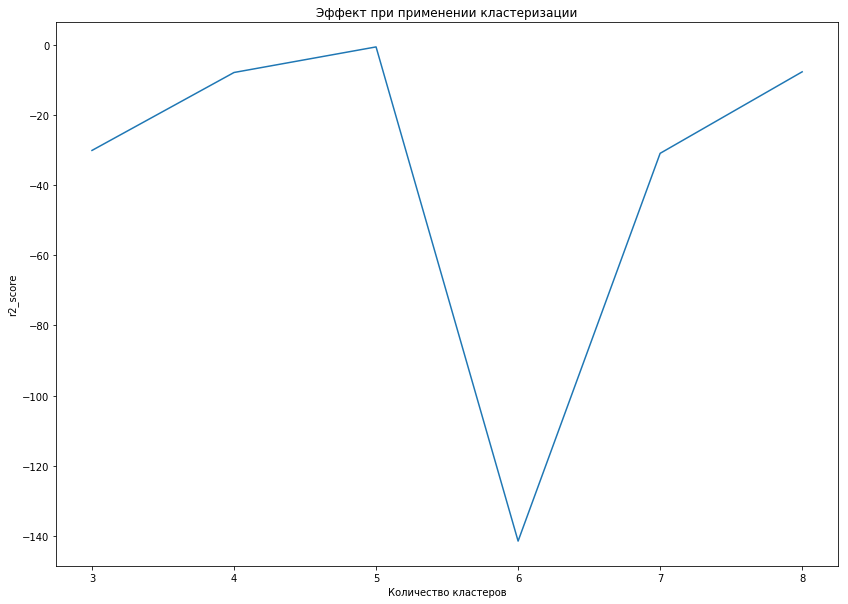

In [29]:
plt.figure(figsize=(14, 10))
plt.plot(np.arange(3, 9), results_by_cluster_num)
plt.xlabel('Количество кластеров')
plt.ylabel('r2_score')
plt.title('Эффект при применении кластеризации')
plt.show()

In [25]:
def good_f2(x, y):
    return (x - y) * (x**2 + np.log(30 + y))

In [26]:
good_sample_real2 = np.vectorize(good_f2)(good_sample[:, 0], good_sample[:, 1])

In [28]:
results_by_cluster_num2 = []

for cluster_num in tqdm.tqdm(range(3, 9)):
    solver = clusterized_genetic_mse.ClusterizedGeneticAlgo(cluster_num)
    solver.fit(good_sample, good_sample_real2)
    results_by_cluster_num2.append(r2_score(solver.predict(good_sample), good_sample_real2))

  0%|          | 0/6 [00:00<?, ?it/s]/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:76: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:84: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: invalid value encountered in sqrt
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return 

-3.1867494171529465e+28
-1.2282197681771884e+38
-2.166928105696299e+37


 17%|█▋        | 1/6 [01:36<08:02, 96.55s/it]

-8.952019584714742e+36
-3.774133642230902e+37
-6.871345663910463e+35
-1.930333721165132e+36


 33%|███▎      | 2/6 [03:48<07:08, 107.03s/it]

-6.14465581265077e+38
-3.596833651998964e+35


/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: overflow encountered in true_divide
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))


-5.334598532255567e+95
-2.3310518823364472e+38
-2.54083828216114e+37


 50%|█████     | 3/6 [06:38<06:18, 126.09s/it]

-9.391942317588889e+36
-6.912407529953132e+36
-1.1642498855678244e+40
-2.3077149534743078e+38
-1.2674889025387225e+36
-5.434838841951765e+36


 67%|██████▋   | 4/6 [09:22<04:34, 137.49s/it]

-6.068127882928267e+36
-3.568840437510039e+37
-5.951596450709113e+37
-9.684931686335468e+38
-3.061283268993904e+35
-1.3463355448674612e+36
-3.98139432504563e+33


 83%|████████▎ | 5/6 [12:54<02:39, 159.67s/it]

-3.0668555448274595e+37
-8.936186464678198e+38
-1.317621328759531e+124
-4.2866489614982447e+36
-2.624302124264885e+270
-2.862936816373995e+38
-1.338302091501782e+36
-3.229870989090841e+39


100%|██████████| 6/6 [16:37<00:00, 178.81s/it]


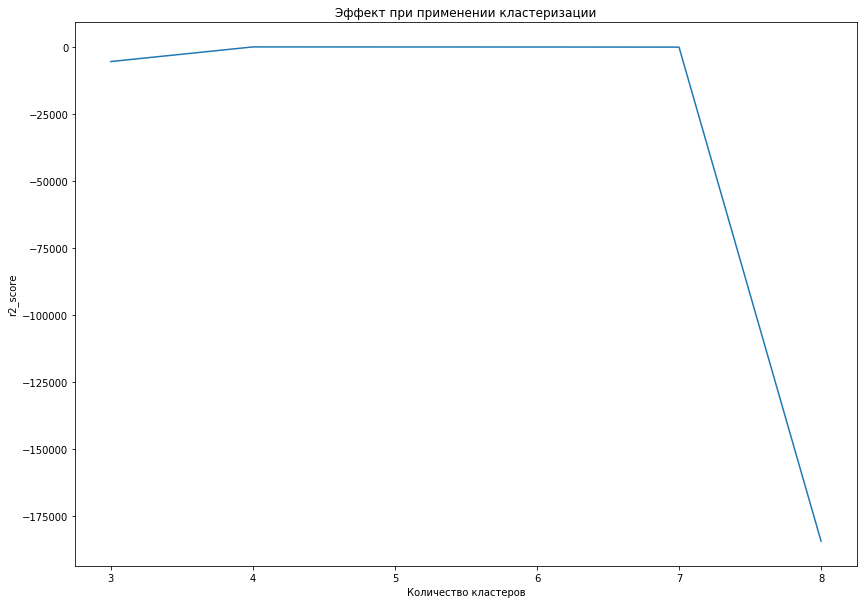

In [32]:
plt.figure(figsize=(14, 10))
plt.plot(np.arange(3, 9), results_by_cluster_num2)
plt.xlabel('Количество кластеров')
plt.ylabel('r2_score')
plt.title('Эффект при применении кластеризации')
plt.show()

In [34]:
general_model = clusterized_genetic_mse.genetic_algo_mse(good_sample, good_sample_real2)

/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:76: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:84: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: invalid value encountered in sqrt
  return self.get_correct_value(self.func(*[node.calc(x, y) for node in self.nodes]))
/home/mike/Документы/MIPT_sem6/my_science/2019-Project-27/code/base_experiment/genetic_algorithm/primitive.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return self.get_correct_value(self.func(*[no

-1.3327155585158975e+39
